In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.4'

In [3]:
dd.apply_dark_theme()

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

In [6]:
model.list_morphologies()

['Park_2019_sorted', 'Park_2019_target_branch', 'Park_2019']

In [7]:
model.load_morphology(file_name='Park_2019')

Sorted PointTree(root=Point(idx=0), num_nodes=2214).
Extended 44 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=2258).


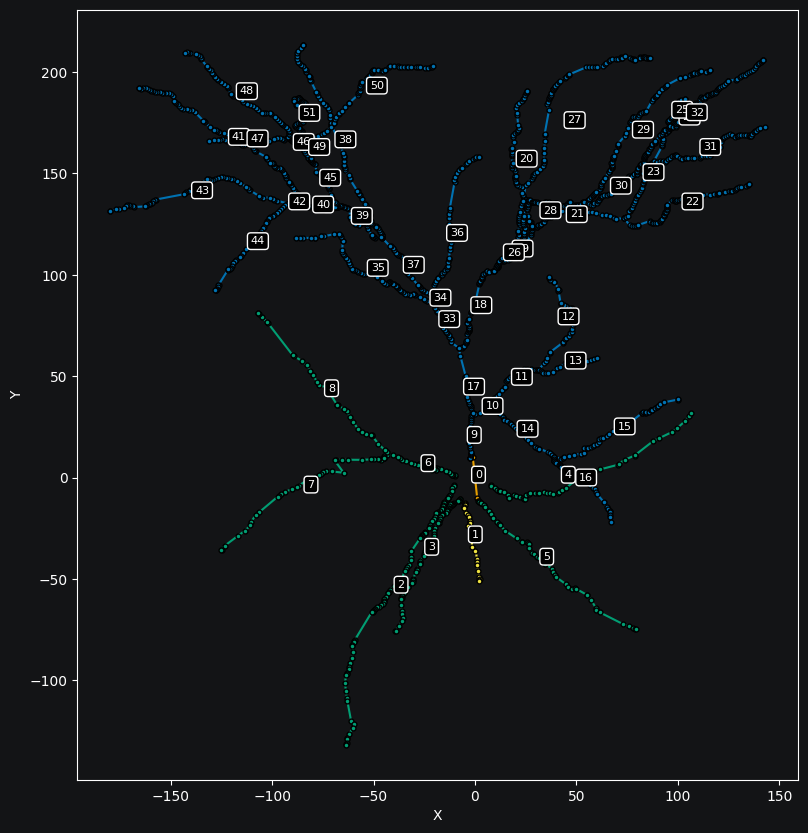

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

# Mechanisms

In [9]:
model.list_biophys()

['Park_2019_remove_Na_from_branch', 'Park_2019_reduced_apic', 'Park_2019_full']

In [10]:
model.load_biophys('Park_2019_full')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Kv.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Ka.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/KCa.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Km.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/CaLVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Park_2019/biophys/python/Na.py


In [11]:
model.params

{'cm': {'all': constant({'value': 2}), 'somatic': constant({'value': 1})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 9.09090909090909e-05})},
 'e_Leak': {'all': constant({'value': -79})},
 'depth_CaDyn': {'all': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 50})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 1})},
 'kt_CaDyn': {'all': constant({'value': 0})},
 'kd_CaDyn': {'all': constant({'value': 0})},
 'gbar_CaHVA': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 5e-06}),
  'basal': linear({'slope': 1e-08, 'intercept': 5e-06}),
  'proximal_apical': sinusoidal({'amplitude': 4.923e-06, 'frequency': 0.008758, 'phase': 0.8656}),
  'distal_apical': constant({'value': 2e-06})},
 'eca': {'all': constant({'value': 140})},
 'gbar_CaLVA': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3e-05}),
  'basal': linear({'slope': 6e-08, 'intercept': 3

In [12]:
root = model.sec_tree[9]

<Axes: title={'center': 'Radius Distribution - Section 9 (apic)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

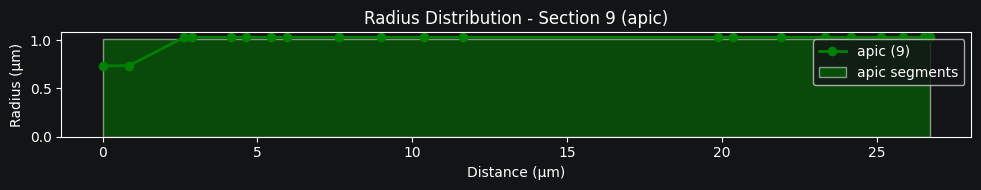

In [13]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [14]:
data = model.reduce_subtree(root, fit=True)

CableParams(length=764.4908970856915, diam=2.5167725013613853, space_const=831.9329527518314, cm=2.0, rm=11000.0, ra=100.0, e_pas=-79.0, electrotonic_length=0.9189333041285863)
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=45).
Sorted PointTree(root=Point(idx=0), num_nodes=2048).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=219).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=62).
Sorted PointTree(root=Point(idx=0), num_nodes=396).
Interpolated for ids []


(model.py, line 815)
(model.py, line 790)
(model.py, line 815)
(model.py, line 815)


In [15]:
# # Fit distributions to data for the group
# group_name = 'apical'
# segments = model.get_segments(group_names=[group_name])
# for param_name in model.params:
#     model.fit_distribution(param_name, segments=segments, plot=True)

In [16]:
model.params

{'cm': {'all': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'reduced_0': constant({'value': 2.0})},
 'Ra': {'all': constant({'value': 100}),
  'reduced_0': constant({'value': 100.0})},
 'gbar_Leak': {'all': constant({'value': 9.09090909090909e-05}),
  'reduced_0': constant({'value': 9.09090909091e-05})},
 'e_Leak': {'all': constant({'value': -79}),
  'reduced_0': constant({'value': -79.0})},
 'depth_CaDyn': {'all': constant({'value': 0.1}),
  'reduced_0': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 50}),
  'reduced_0': constant({'value': 50.0})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001}),
  'reduced_0': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 1}),
  'reduced_0': constant({'value': 1.0})},
 'kt_CaDyn': {'all': constant({'value': 0}),
  'reduced_0': constant({'value': -0.0})},
 'kd_CaDyn': {'all': constant({'value': 0}),
  'reduced_0': constant({'value': -0.0})},
 'gbar_CaHVA': {'all': constant({'value'

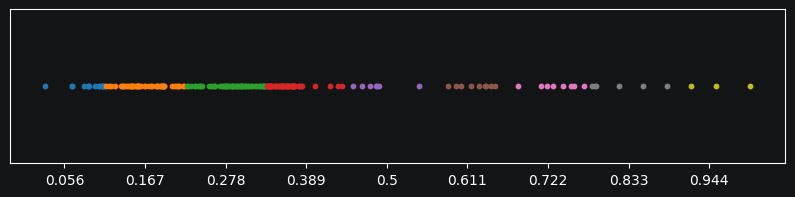

In [17]:
segs_to_reduced_segs = data['segs_to_reduced_segs']
segs_to_locs = data['segs_to_locs']
fig, ax = plt.subplots(figsize=(10, 2))
reduced_segs = root.segments
reduced_seg_to_color = {seg: plt.cm.tab10.colors[i] for i, seg in enumerate(reduced_segs)}
ax.set_ylim(-1, 1)
for seg, loc in segs_to_locs.items():
    plt.scatter(loc, [0], s=10, color=reduced_seg_to_color[segs_to_reduced_segs[seg]])

norm_centers = np.round(np.array(root.seg_centers)/root.L, 3)
ax.set_xticks(norm_centers);
ax.set_xticklabels(norm_centers);
ax.set_yticks([]);

<Axes: title={'center': 'Radius Distribution - Section 9 (reduced_0)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

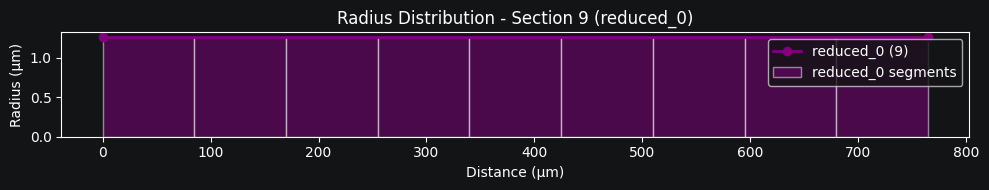

In [18]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [19]:
model.params

{'cm': {'all': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'reduced_0': constant({'value': 2.0})},
 'Ra': {'all': constant({'value': 100}),
  'reduced_0': constant({'value': 100.0})},
 'gbar_Leak': {'all': constant({'value': 9.09090909090909e-05}),
  'reduced_0': constant({'value': 9.09090909091e-05})},
 'e_Leak': {'all': constant({'value': -79}),
  'reduced_0': constant({'value': -79.0})},
 'depth_CaDyn': {'all': constant({'value': 0.1}),
  'reduced_0': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 50}),
  'reduced_0': constant({'value': 50.0})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001}),
  'reduced_0': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 1}),
  'reduced_0': constant({'value': 1.0})},
 'kt_CaDyn': {'all': constant({'value': 0}),
  'reduced_0': constant({'value': -0.0})},
 'kd_CaDyn': {'all': constant({'value': 0}),
  'reduced_0': constant({'value': -0.0})},
 'gbar_CaHVA': {'all': constant({'value'

In [20]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 2}
1,Independent,cm,somatic,constant,{'value': 1}
2,Independent,cm,reduced_0,constant,{'value': 2.0}
3,Independent,Ra,all,constant,{'value': 100}
4,Independent,Ra,reduced_0,constant,{'value': 100.0}
...,...,...,...,...,...
81,Na,qh_Na,reduced_0,constant,{'value': 5.0}
82,Na,v12hinf_Na,all,constant,{'value': -60}
83,Na,v12hinf_Na,reduced_0,constant,{'value': -60.0}
84,Na,qhinf_Na,all,constant,{'value': 6.2}


# Groups

In [21]:
model.domains_to_mechs

{'axon': {'Leak'},
 'dend': {'CaDyn', 'CaHVA', 'CaLVA', 'KCa', 'Ka', 'Km', 'Kv', 'Leak', 'Na'},
 'soma': {'CaDyn', 'CaHVA', 'CaLVA', 'KCa', 'Ka', 'Km', 'Kv', 'Leak', 'Na'},
 'reduced_0': {'CaDyn',
  'CaHVA',
  'CaLVA',
  'KCa',
  'Ka',
  'Km',
  'Kv',
  'Leak',
  'Na'}}

In [22]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'dend', 'soma', 'reduced_0']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'dendritic': SegmentGroup("dendritic", domains=['dend']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'dendritic_thin': SegmentGroup("dendritic_thin", domains=['dend'], section_diam(None, 0.8)),
 'dendritic_thick': SegmentGroup("dendritic_thick", domains=['dend'], section_diam(0.8, None)),
 'basal': SegmentGroup("basal", domains=['dend']),
 'reduced_0': SegmentGroup("reduced_0", domains=['reduced_0'])}

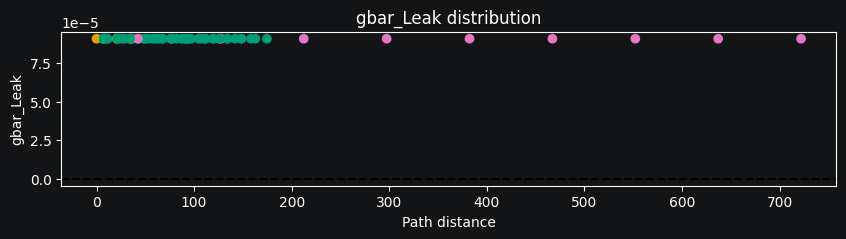

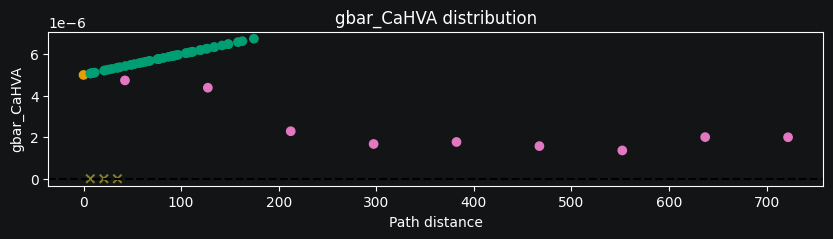

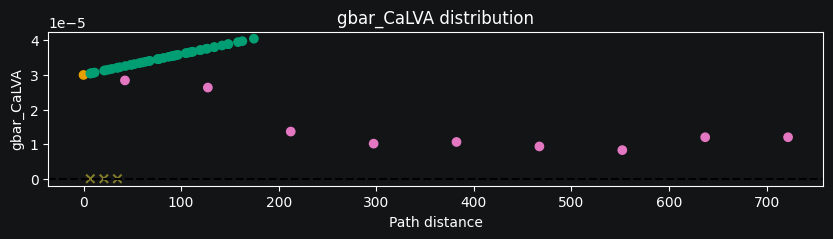

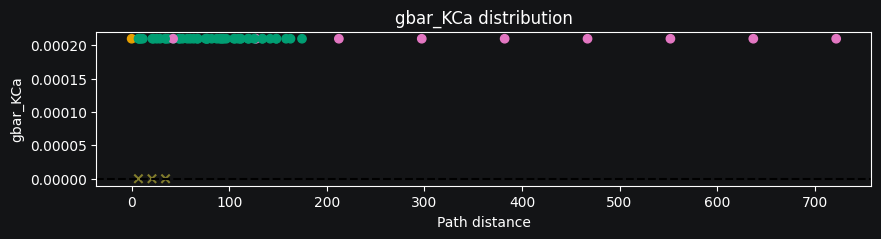

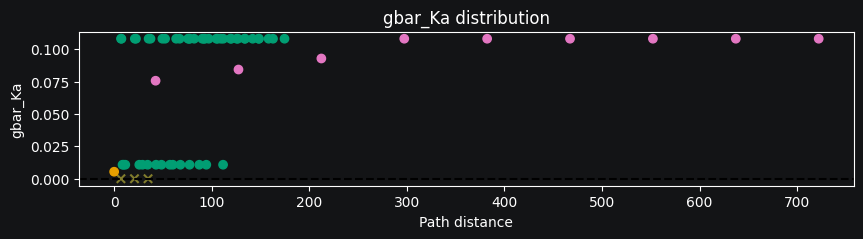

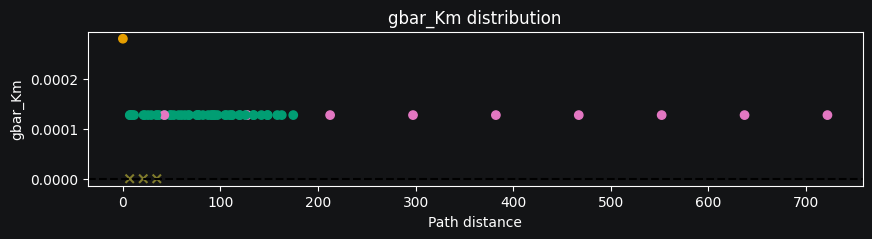

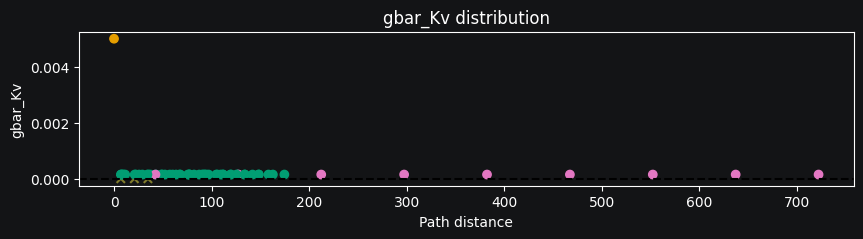

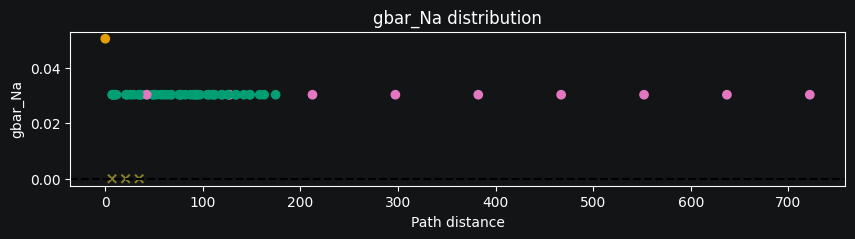

In [23]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

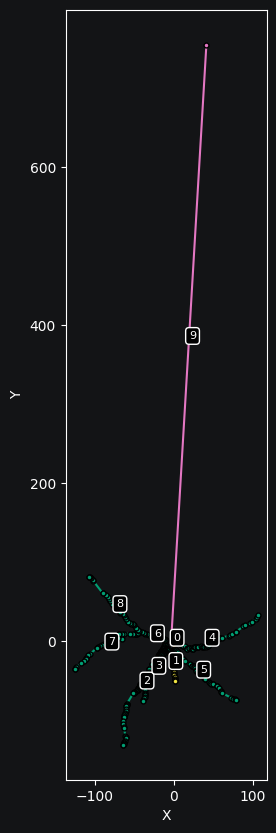

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [25]:
model.list_stimuli()

['hyperpolarizing_current',
 'depolarizing_current',
 '50_AMPA_apical',
 'attenuation_soma']

In [26]:
soma = model.sec_tree.soma
model.load_stimuli('depolarizing_current')

IClamp added to sec NeuronSection(idx=0) at loc 0.5.
Recording added to sec NeuronSection(idx=0) at loc 0.5.
Recording added to sec NeuronSection(idx=0) at loc 0.5.
Recording added to sec NeuronSection(idx=0) at loc 0.5.


In [27]:
model.iclamps[soma(0.5)].amp= 0.172

In [28]:
model.run(1000)

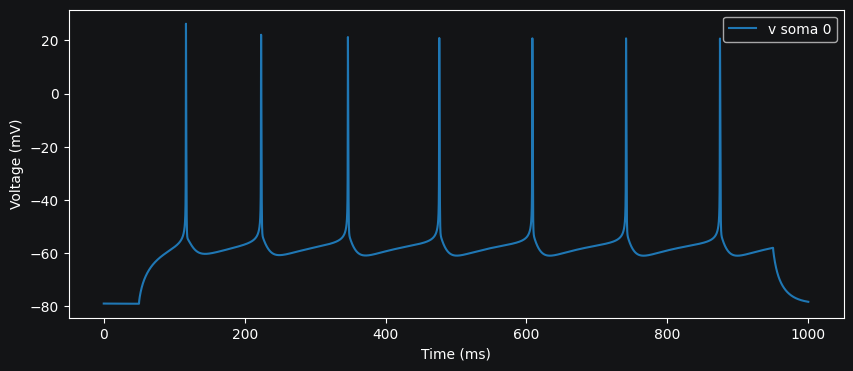

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)

In [30]:
model.export_biophys(file_name='Park_2019_reduced_apic')

# Example

In [31]:
xs = [seg.path_distance() for seg in root.segments]
ys = [seg.get_param_value('gbar_CaLVA') for seg in root.segments]

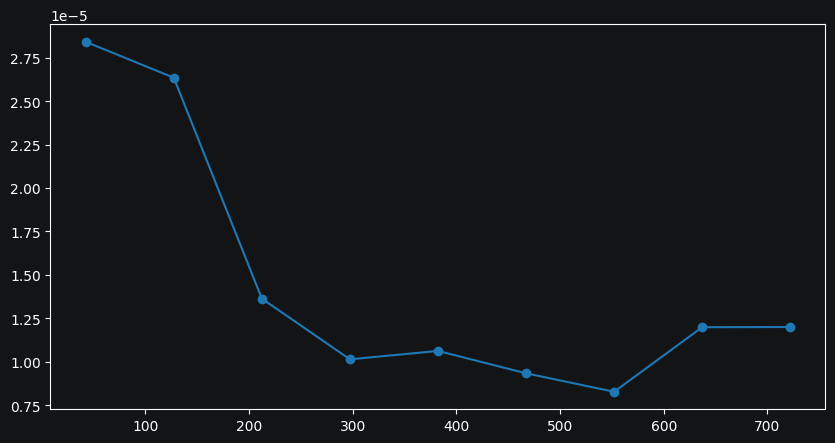

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, 'o-')

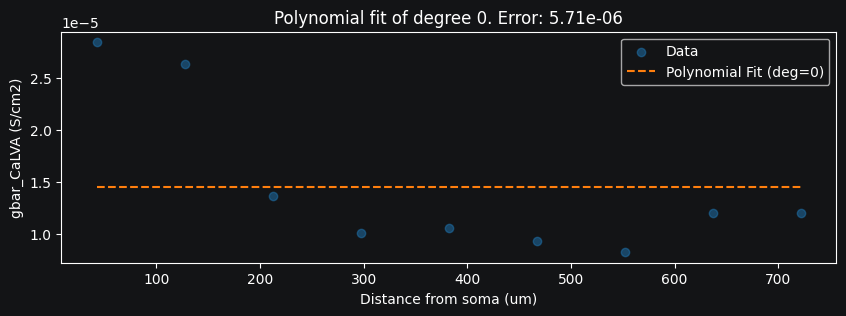

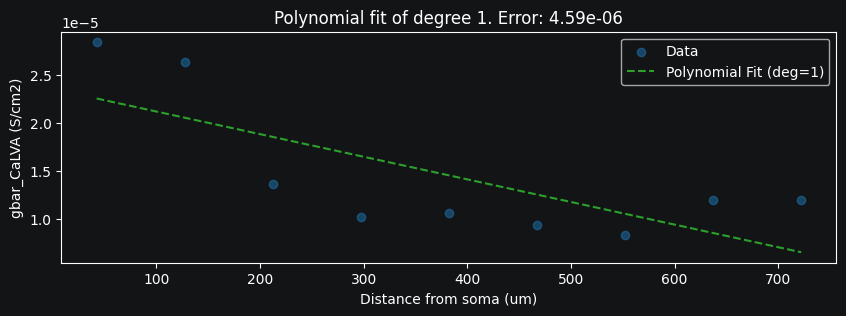

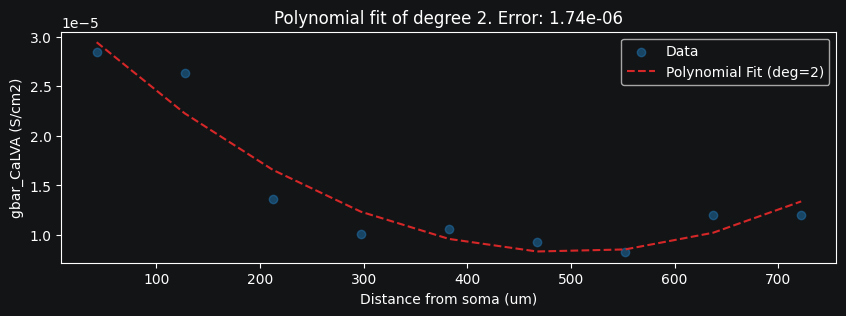

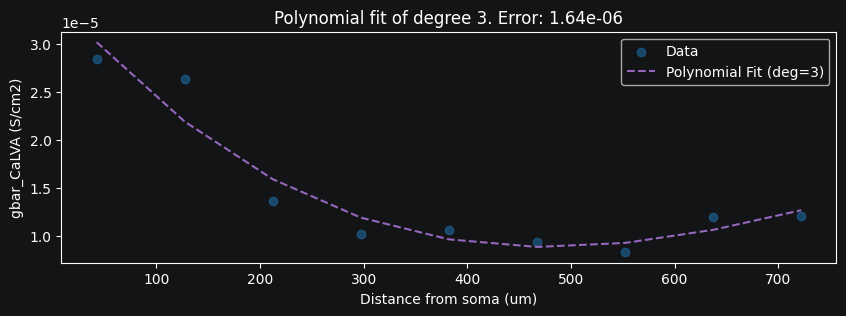

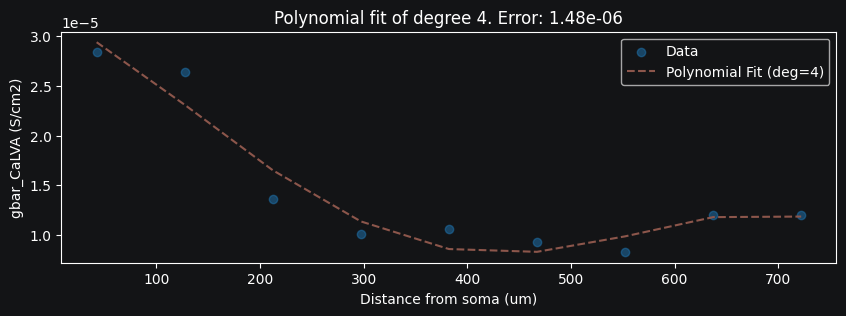

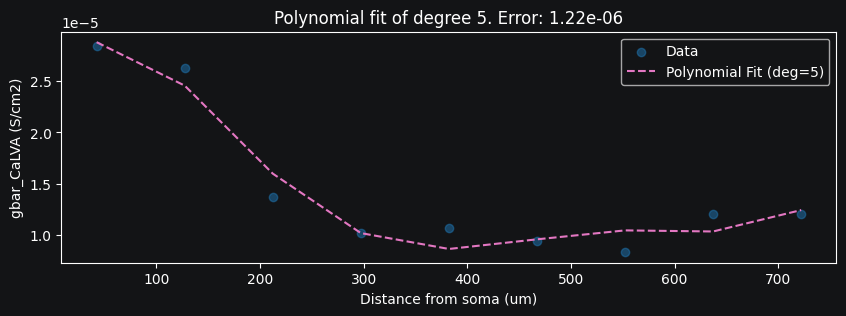

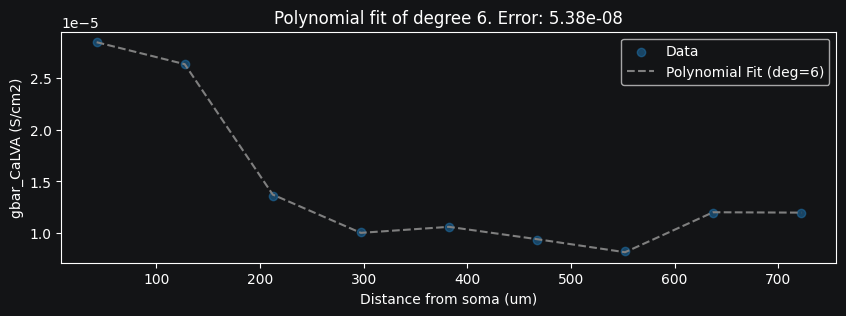

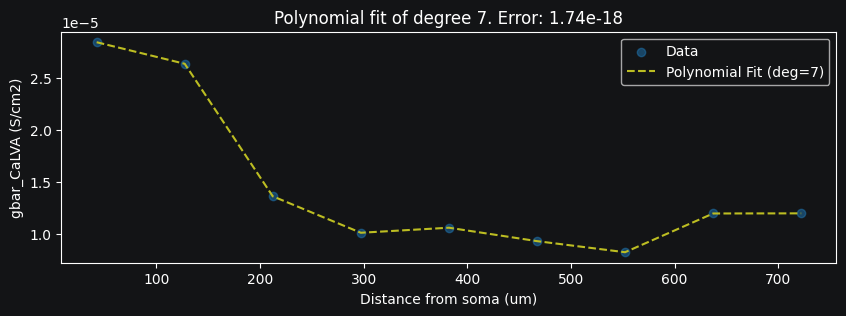

In [33]:
# Fit a polynomial of degree 4
degrees = np.arange(0, 8)
errors = []
fits = []
for degree in degrees:
    coeffs = np.polyfit(xs, ys, degree)
    ys_fit = np.polyval(coeffs, xs)
    error = np.mean(np.abs(ys - ys_fit))
    errors.append(error)
    fits.append(ys_fit)
# degree = 6
# coeffs = np.polyfit(xs, ys, degree)

# Generate fitted curve
# ys_fit = np.polyval(coeffs, xs)

# Plot
for i, degree in enumerate(degrees):
    plt.figure(figsize=(10, 3))
    plt.scatter(xs, ys, label="Data", alpha=0.5)
# plt.plot(xs, ys_fit, color='red', label=f"Polynomial Fit (deg={degree})")
    plt.plot(xs, fits[i], label=f"Polynomial Fit (deg={degree})", color=plt.cm.tab10.colors[i+1], linestyle='--')
    plt.legend()
    plt.title(f"Polynomial fit of degree {degree}. Error: {errors[i]:.2e}")
    plt.xlabel("Distance from soma (um)")
    plt.ylabel("gbar_CaLVA (S/cm2)")



In [34]:
model.export_to_NEURON(file_name='Park_2019_reduced_NEURON', include_kinetic_params=True)